## Dissection the gene annotation/ontology terms between CAD and TAS

In [15]:
library("ggplot2")
library("stringr")
library(reshape2)

### Part 1: Phenome-wide results for the top SNVs

In [16]:
Phenomewide=read.csv("Pathway_enrichment_Table_1.csv")

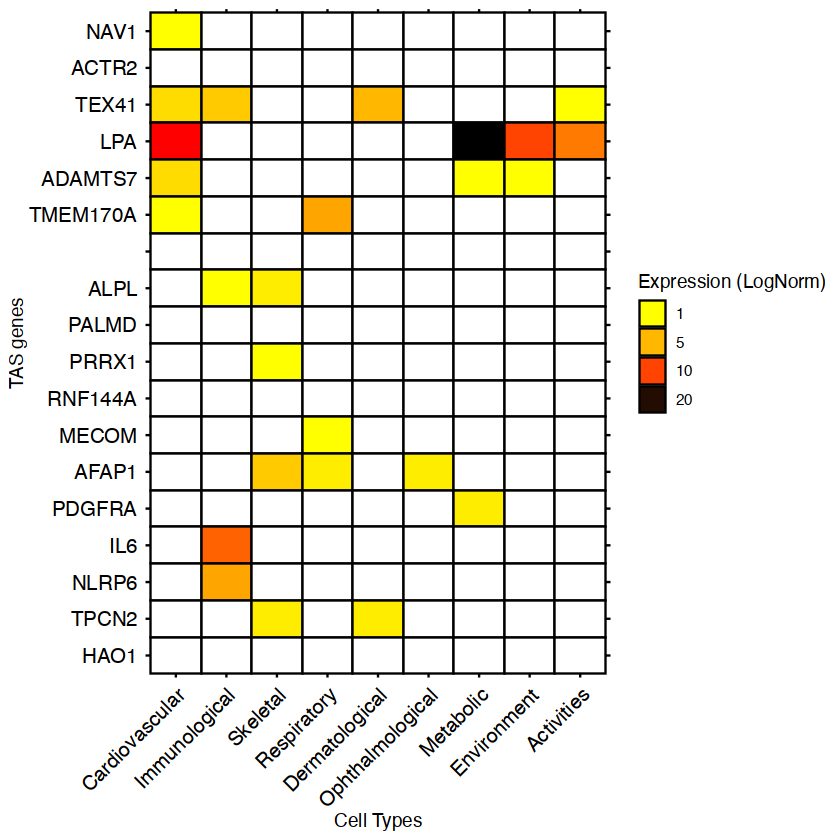

In [17]:
# Assuming your data matrix is named 'data_matrix'
# Exclude the first three columns (SNV, Chromosome, Gene) from the data
expression_data <- Phenomewide[, -(1:3)]
rownames(expression_data)=Phenomewide[, 3]

library(ggplot2)
p_values_matrix=as.matrix(expression_data)

# Assuming your matrix is named 'p_values_matrix'
library(ggplot2)
library(reshape2)
library(scales)

# Convert the matrix to a data frame
data <- melt(p_values_matrix)

# Define the breaks for the color scale
color_breaks <- c(0, 1, 5, 10, 20)

# Generate the heatmap with separated cells and custom color key
p <- ggplot(data, aes(x = Var2, y = Var1, fill = value)) +
  geom_tile(color = "black", size = 0.5) +
  scale_fill_gradientn(colors = c("yellow", "orange", "red", "darkred", "black"),
                       breaks = color_breaks,
                       na.value = "white", guide = "legend") +
  labs(x = "Cell Types", y = "TAS genes", fill = "Expression (LogNorm)") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1),
        axis.text.x.bottom = element_text(size = 12, color = "black"),
        axis.text.y.left = element_text(size = 12, color = "black"),
        panel.grid.major = element_line(color = "black", linewidth = 0.5),
        panel.grid.minor = element_blank())  +
        scale_y_discrete(limits=rev)
  # All cells colored orange 
p


Warning message:
“Removed 136 rows containing missing values or values outside the scale range
(`geom_text()`).”


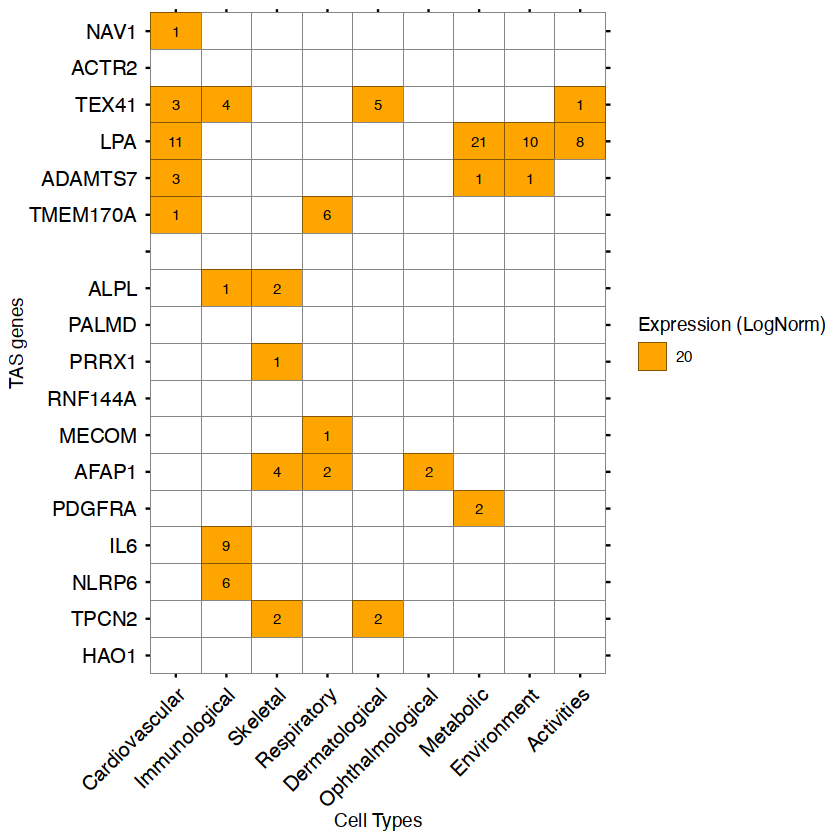

In [19]:
# Define the breaks for the color scale
color_breaks <- c(20)

# Generate the heatmap with separated cells and custom color key
p <- ggplot(data, aes(x = Var2, y = Var1, fill = value, label = value)) +
  geom_tile(color = "black") +


  geom_text(color = "black", size = 3) +  # Center the labels
  scale_fill_gradientn(colors = c("orange"),
                       breaks = color_breaks,
                       na.value = "white", guide = "legend") +
  labs(x = "Cell Types", y = "TAS genes", fill = "Expression (LogNorm)") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1),
        axis.text.x.bottom = element_text(size = 12, color = "black"),
        axis.text.y.left = element_text(size = 12, color = "black"),
        axis.ticks.x = element_blank(),
        panel.grid.major = element_line(color = "black", linewidth = 0.5),
        panel.grid.minor = element_blank()) +  # Remove ticks
 
scale_y_discrete(limits = rev)


#pdf("Fig_3a_2.pdf")
p
#dev.off()

### Part 2: GO-terms exclusive to TAS

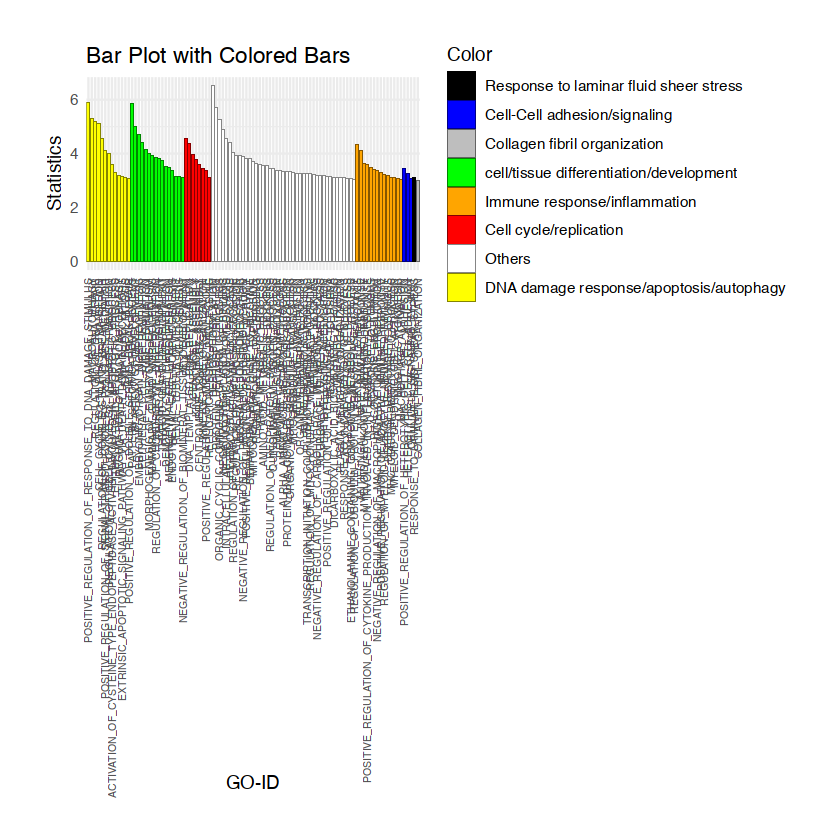

In [37]:
# Load required libraries
library(ggplot2)
library(dplyr)
library(stringr)

# Dataset
Fig_3b <- read.csv("Pathway_enrichment_Table_2.csv")
Fig_3b$GO.term <- str_split(Fig_3b$GO.term, "GOBP_", simplify = TRUE)[, 2]

# Example data (replace this with your actual data)
data <- data.frame(
  Color = Fig_3b$Color,
  GO_ID = Fig_3b$GO.term,
  Statistics = Fig_3b$Stat
)

# Calculate median statistics for each color group
median_stats <- data %>%
  group_by(Color) %>%
  summarise(Median_Statistics = median(Statistics)) %>%
  arrange(desc(Median_Statistics))

# Sort data based on Color and Statistics
data <- data[order(factor(data$Color, levels = median_stats$Color), -data$Statistics), ]

# Reorder GO_ID within each color group based on median statistics
data$GO_ID <- factor(data$GO_ID, levels = data$GO_ID[order(factor(data$Color, levels = median_stats$Color), -data$Statistics)])

# Define custom labels for color key
color_labels <- c(
  "yellow" = "DNA damage response/apoptosis/autophagy",
  "red" = "Cell cycle/replication ",
  "blue" = "Cell-Cell adhesion/signaling",
  "white" = "Others",
  "green" = "cell/tissue differentiation/development ",
  "orange" = "Immune response/inflammation",
  "gray" = "Collagen fibril organization",
  "black" = "Response to laminar fluid sheer stress"
)

# Plotting
p <- ggplot(data, aes(x = GO_ID, y = Statistics, fill = Color)) +
  geom_bar(stat = "identity", color = "black", size = 0.1) +
  scale_fill_manual(
    values = c(
      "yellow" = "yellow",
      "red" = "red",
      "blue" = "blue",
      "white" = "white",
      "green" = "green",
      "orange" = "orange",
      "gray" = "gray",
      "black" = "black"
    ),
    labels = color_labels
  ) +
  labs(x = "GO-ID", y = "Statistics", title = "Bar Plot with Colored Bars") +
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1, size = 6),  # Rotate and decrease font size
    plot.margin = margin(1, 1, 1, 1, "cm")  # Adjust plot margins
  )

p


In [ ]:
F